# THE SPARKS FOUNDATION 
# TASK 6 - Prediction using Decision Tree Algorithm
# NAME -  RUPALI GULAVE




# OBJECTIVE

### Create the Decision Tree classifier and visualize it graphically.

# Step 1 :  Import Library and Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the data in
data = pd.read_csv(r"D:\Mahesh\The sparks Foundation\tasks\Task 6\iris.csv")

In [30]:
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Step 2 : Data Pre-Processing

### Univariate Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Removing Irrelavent Variable

In [6]:
data = data.drop(['Id'],axis=1)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Checking Missing Value

In [7]:
# Do we have NA's in data
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Outlier

<AxesSubplot:>

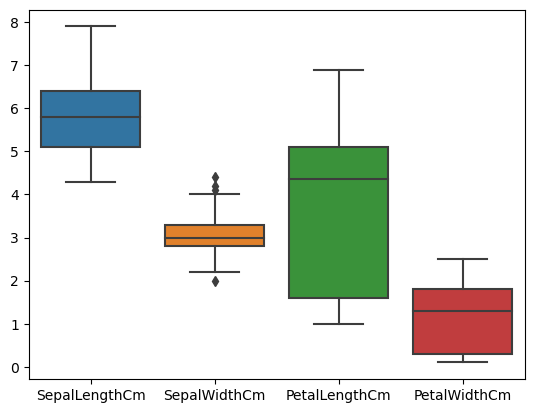

In [8]:
import seaborn as sns
sns.boxplot(data=data)

### Removing Outliers by Winsorizing technique 

In [9]:
q1 = data['SepalWidthCm'].quantile(0.25)
q3 = data['SepalWidthCm'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range

In [10]:
data['SepalWidthCm']=np.where(data['SepalWidthCm'] > upper_limit,upper_limit,data['SepalWidthCm']) # upper limit

In [11]:
data['SepalWidthCm']=np.where(data['SepalWidthCm'] < low_limit,low_limit,data['SepalWidthCm']) # low_limit

<AxesSubplot:>

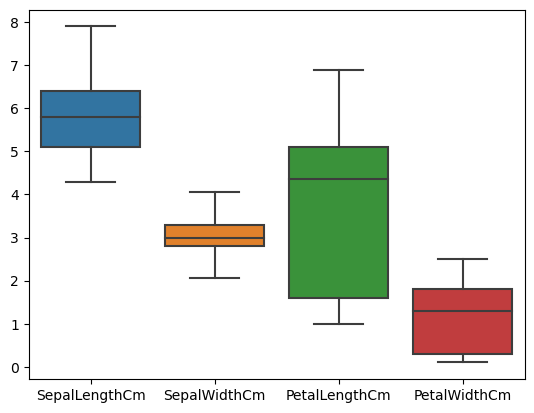

In [12]:
import seaborn as sns
sns.boxplot(data=data)

### Taking subset data of Number

In [13]:
data.select_dtypes(include=[np.number]).columns.tolist()

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [14]:
# #data Numeric columns
data_num = data[data.select_dtypes(include=[np.number]).columns.tolist()]
data_num.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


### Taking subset data of Category 

In [15]:
data_dummies = data[data.select_dtypes(include=['object']).columns.tolist()]
data_dummies.head(3)

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa


### Converting Quality Variable to Number

In [16]:
from sklearn.preprocessing import LabelEncoder
data_dummies=data_dummies.apply(LabelEncoder().fit_transform)
data_dummies.head(3)
# label in ascending order

,Species
0,0
1,0
2,0


### Combine to Dataset

In [17]:
data_combined = pd.concat([data_num, data_dummies],axis=1)

In [18]:
data_combined.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
x = data_combined.drop(['Species'],axis=1)
x.columns


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [20]:
y= data_combined["Species"]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

# Step 3: Model Building

In [21]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(x,y)  # Model = dt

DecisionTreeClassifier()

# Step 4: Plotting the Tree 

In [22]:
new=pd.concat([y,x],axis=1)
new.head()

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


In [23]:
independent_variable = list(new.columns[1:])
independent_variable

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

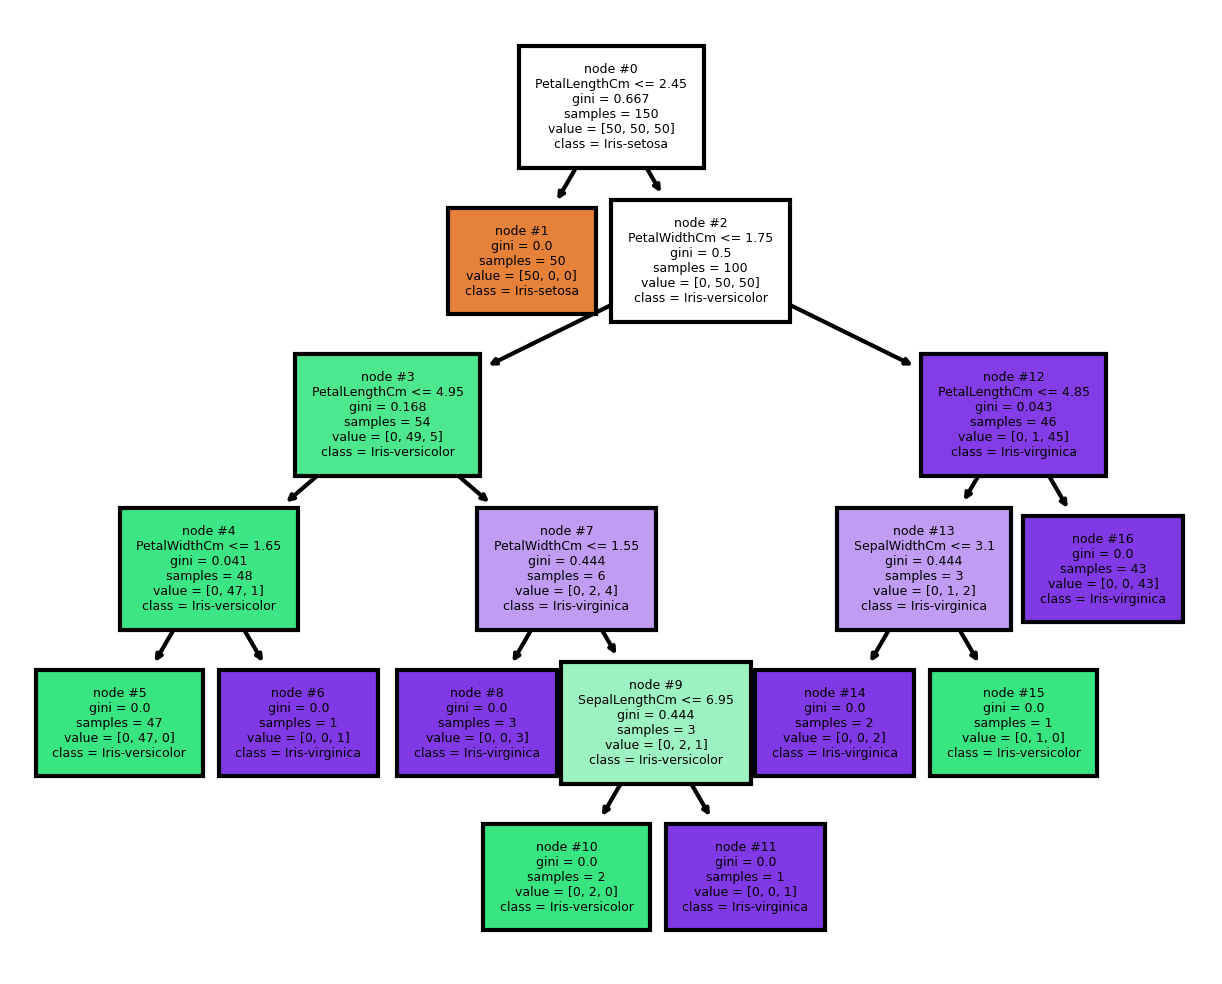

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt

Species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Species, 
               filled = True, # colour
              node_ids=True, # node number
              fontsize=3); # 
#fig.savefig('imagename.png')